In [12]:
%load_ext autoreload
%autoreload 2

import utils
from visualization.simple_data_vis import histograms
import surrogate_models.dab_nn_defs as engine
import kerastuner as kt
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
train, test = tf.keras.datasets.boston_housing.load_data(path="boston_housing.npz", test_split=0.2, seed=113)
x =  ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']    
y = ['price',]

train = (pd.DataFrame(train[0], columns=x).to_dict('list'),pd.DataFrame(train[1], columns=y).to_dict('list'))
test = (pd.DataFrame(test[0], columns=x).to_dict('list'),pd.DataFrame(test[1], columns=y).to_dict('list'))

In [20]:
prob_bnn_model = engine.create_probablistic_bnn_model(
    FEATURE_NAMES = x,
    TARGET_NAMES = y, 
    train_size = len(train), 
    n_outputs = len(y),
    hidden_units = [100,],
    name = 'PBNN_'+'boston'
    )

# specify train/test routine 
engine.run_experiment(
    model = prob_bnn_model, 
    loss = tf.keras.metrics.MeanAbsoluteError(), 
    learning_rate = 0.001,
    num_epochs = 300,
    train_dataset = tf.data.Dataset.from_tensor_slices(train).batch(len(train)), 
    test_dataset = tf.data.Dataset.from_tensor_slices(test).batch(len(test)),
    verbose = 1
    )

 - loss: 173.8631 - mean_squared_error: 557.9728 - mean_absolute_error: 22.0113 - val_loss: 177.4711 - val_mean_squared_error: 594.0288 - val_mean_absolute_error: 22.6139
Epoch 50/300
202/202 [==============================] - 10s 47ms/step - loss: 176.9683 - mean_squared_error: 554.4902 - mean_absolute_error: 21.9791 - val_loss: 179.9333 - val_mean_squared_error: 589.3707 - val_mean_absolute_error: 22.4951
Epoch 51/300
202/202 [==============================] - 9s 47ms/step - loss: 178.2317 - mean_squared_error: 558.2423 - mean_absolute_error: 21.9619 - val_loss: 175.4455 - val_mean_squared_error: 600.0473 - val_mean_absolute_error: 22.6929
Epoch 52/300
202/202 [==============================] - 9s 46ms/step - loss: 177.8678 - mean_squared_error: 550.7879 - mean_absolute_error: 21.9636 - val_loss: 177.9725 - val_mean_squared_error: 592.9212 - val_mean_absolute_error: 22.6033
Epoch 53/300
202/202 [==============================] - 9s 47ms/step - loss: 178.2228 - mean_squared_error: 556

KeyboardInterrupt: 

Text(0, 0.5, 'predicted')

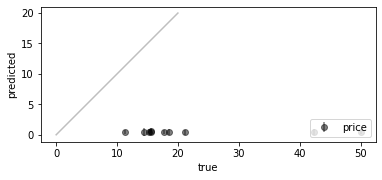

In [38]:
import matplotlib.pyplot as plt
N = 10

sample_inputs, sample_outputs = list(tf.data.Dataset.from_tensor_slices(train).batch(N))[0]

out = []
for i in range(N):
    out.append(prob_bnn_model(sample_inputs))
out = tf.stack(out,-1)

colors = ['k','r']
for i in range(1):
    plt.errorbar(list(sample_outputs.values())[i].numpy(), out.numpy().mean(-1),
    yerr = out.numpy().std(-1).squeeze(),
    label = y[i],
    marker = 'o', color = colors[i], alpha = 0.5,
    ls = 'none')
plt.plot([0,20],[0,20],'k',alpha=0.25)
plt.legend(loc='lower right')
plt.gca().set_aspect('equal')
plt.xlabel('true')
plt.ylabel('predicted')